<h2 style="text-align:center; line-height:1.5;">Impacto de la Concentración de Mercado en los<br>Precios del Sector Gasolinero en Guatemala</h2>



In [1]:
suppressPackageStartupMessages({
# Cargar las librerías necesarias
library(readxl) 
library(dplyr)   
library(knitr) 
library(tidyr)  
library(ggplot2)
library(lmtest)
library(tseries)
library(gridExtra)
library(psych)
})

# Leer el archivo Excel 
df <- read_excel("~/Rstudio/EconometriaI/Dataset.xlsx", 
                 sheet = "Hoja1")

# Cambiar los nombres de las columnas 
colnames(df) <- c("Años", "PGS", "PGR", "PD", 
                  "PPC", "CGS", "CGR", "CD", "REZAGOGS")

# Verificar los nombres de las columnas
colnames(df)

# Asegurarse de que la columna "Años" esté en formato Date
df <- df %>%
  mutate(Años = as.Date(Años))  


[1] "Años"     "PGS"      "PGR"      "PD"       "PPC"      "CGS"      "CGR"     
[8] "CD"       "REZAGOGS"

In [2]:
# Verificar los datos después de la limpieza
head(df)

Años,PGS,PGR,PD,PPC,CGS,CGR,CD,REZAGOGS
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-01,23.82,23.01,19.10,61.50,655512.7,685943.0,1220638,0.00
2021-02-01,25.53,24.74,20.53,59.16,621712.1,669312.9,1272609,1.71
2021-03-01,27.70,26.89,22.27,63.58,692240.5,773453.5,1417380,2.17
2021-04-01,28.03,27.22,21.77,66.32,610310.8,688389.0,1268491,0.33
2021-05-01,28.80,27.98,22.71,73.47,643076.8,707336.4,1188223,0.77
2021-06-01,28.85,27.90,23.23,73.95,637332.8,692598.7,1128077,0.05


In [3]:
# Resumen estadístico de los datos sin la columna "Años"
summary(df %>% select(-Años))

      PGS             PGR              PD             PPC        
 Min.   :23.82   Min.   :23.01   Min.   :19.10   Min.   : 59.16  
 1st Qu.:30.15   1st Qu.:29.08   1st Qu.:25.19   1st Qu.: 73.02  
 Median :34.53   Median :33.09   Median :30.54   Median : 78.27  
 Mean   :33.60   Mean   :32.39   Mean   :29.92   Mean   : 80.56  
 3rd Qu.:36.46   3rd Qu.:35.19   3rd Qu.:34.53   3rd Qu.: 86.94  
 Max.   :42.14   Max.   :40.16   Max.   :39.93   Max.   :114.67  
 NA's   :1       NA's   :1       NA's   :1       NA's   :1       
      CGS              CGR               CD             REZAGOGS       
 Min.   :483992   Min.   :661522   Min.   : 979243   Min.   :-30.5700  
 1st Qu.:575919   1st Qu.:703199   1st Qu.:1126507   1st Qu.: -0.8500  
 Median :613301   Median :769979   Median :1211760   Median :  0.0600  
 Mean   :610827   Mean   :758400   Mean   :1209092   Mean   : -0.6438  
 3rd Qu.:642053   3rd Qu.:799422   3rd Qu.:1271580   3rd Qu.:  0.9400  
 Max.   :768103   Max.   :875010   Max. 

<div style="font-size: 18px; text-align: justify;">
El análisis muestra que los precios de las gasolinas súper (PGS), regular (PGR) y diésel
(PD) tienen medias entre 29 y 34, reflejando estabilidad. En contraste, el petróleo crudo
(PPC) es más volátil, con una media de 80.56 y un máximo de 114.67.
En términos de consumo, la gasolina regular (CGR) y súper (CGS) presentan patrones
similares, mientras que el diésel (CD) destaca con un consumo promedio de 1,209,092,
indicando su mayor uso, posiblemente en sectores industriales o de transporte.

</div>

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_line()`)."


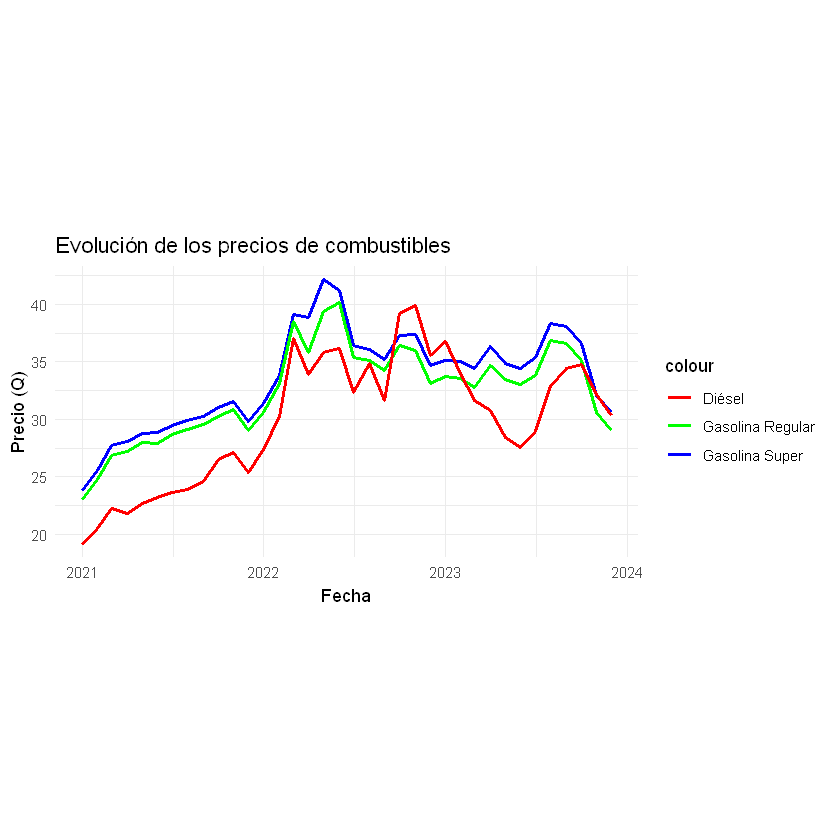

In [4]:
suppressWarnings({
  ggplot(df, aes(x = Años)) +
    geom_line(aes(y = PGS, color = "Gasolina Super"), linewidth = 1) +
    geom_line(aes(y = PGR, color = "Gasolina Regular"), linewidth = 1) +
    geom_line(aes(y = PD, color = "Diésel"), linewidth = 1) +
    labs(title = "Evolución de los precios de combustibles",
         x = "Fecha", y = "Precio (Q)") +
    scale_color_manual(values = c("Gasolina Super" = "blue",
                                  "Gasolina Regular" = "green",
                                  "Diésel" = "red")) +
    theme_minimal() +
    theme(aspect.ratio = 0.5) 
})

<div style="font-size: 18px; text-align: justify;">
Se graficaron las series de tiempo para observar la evolución de los precios de la gasolina
superior (PGS), gasolina regular (PGR) y diésel (PD) en Guatemala, mostrando la
tendencia temporal de cada precio de combustible.
</div>

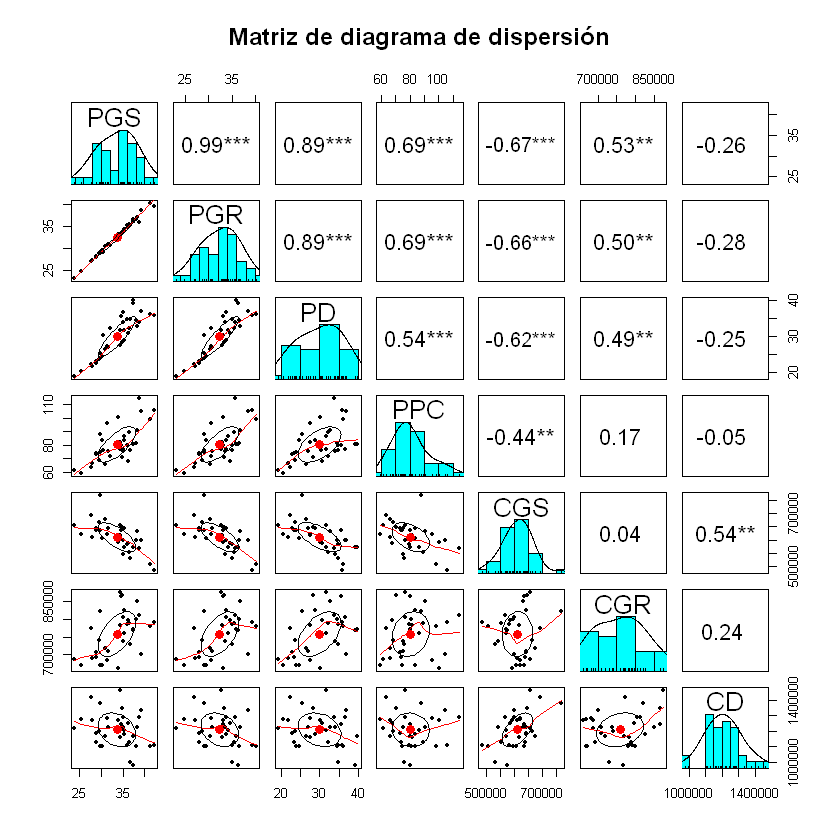

In [5]:
# crear figuras de correlaciones con histograma. 
df_subset <- df[, -c(1, 9)]
pairs.panels( 
  df_subset, 
  pch = 20, 
  stars = TRUE, 
  main = "Matriz de diagrama de dispersión"
)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


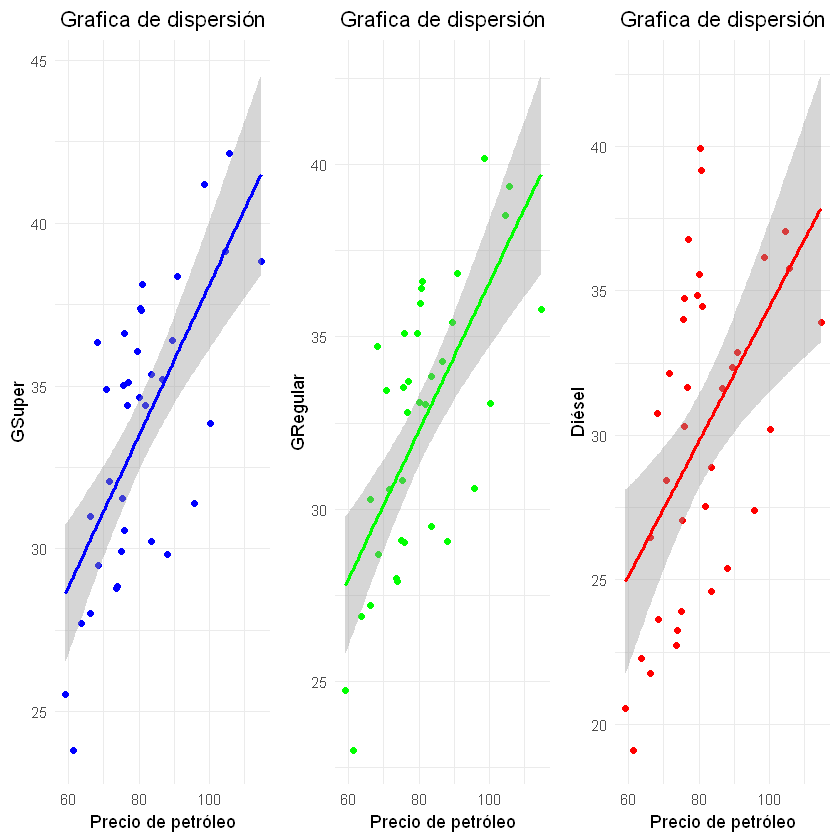

In [6]:
suppressWarnings({
  common_limits <- range(c(df$PGS, df$PGR, df$PD))
  
  # Ajustamos los límites y márgenes del eje x
  max_x <- max(df$PPC) + (max(df$PPC) - min(df$PPC)) * 0.1
  min_x <- min(df$PPC) - (max(df$PPC) - min(df$PPC)) * 0.1

  p1 <- ggplot(df, aes(x = PPC, y = PGS)) +
    geom_point(color = "blue") +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
    labs(title = "Grafica de dispersión",
         x = "Precio de petróleo", y = "GSuper") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    xlim(min_x, max_x) + ylim(common_limits)
  
  p2 <- ggplot(df, aes(x = PPC, y = PGR)) +
    geom_point(color = "green") +
    geom_smooth(method = "lm", se = TRUE, color = "green") +
    labs(title = "Grafica de dispersión",
         x = "Precio de petróleo", y = "GRegular") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    xlim(min_x, max_x) + ylim(common_limits)
  
  p3 <- ggplot(df, aes(x = PPC, y = PD)) +
    geom_point(color = "red") +
    geom_smooth(method = "lm", se = TRUE, color = "red") +
    labs(title = "Grafica de dispersión",
         x = "Precio de petróleo", y = "Diésel") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    xlim(min_x, max_x) + ylim(common_limits)
  
  grid.arrange(p1, p2, p3, ncol = 3)
})


In [7]:
# MODELO 1 Dependiente de precios de gasolinas(PG), Independiente Consumo de gasolinas super (CGS), Precio de petroleo (PPC)
# Ajustar modelo de rmúltiple
modelo1 <- lm(PGS ~ PPC + CGS, data = df)
summary(modelo1)
# Obtener los residuos del modelo
residuos1 <- residuals(modelo1)



Call:
lm(formula = PGS ~ PPC + CGS, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0817 -1.9340  0.3189  2.0659  4.1626 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.321e+01  7.903e+00   5.467 5.63e-06 ***
PPC          1.631e-01  4.005e-02   4.072 0.000299 ***
CGS         -3.712e-05  9.670e-06  -3.839 0.000570 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.731 on 31 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.6431,	Adjusted R-squared:  0.6201 
F-statistic: 27.93 on 2 and 31 DF,  p-value: 1.161e-07



	Jarque Bera Test

data:  residuos1
X-squared = 1.6643, df = 2, p-value = 0.4351


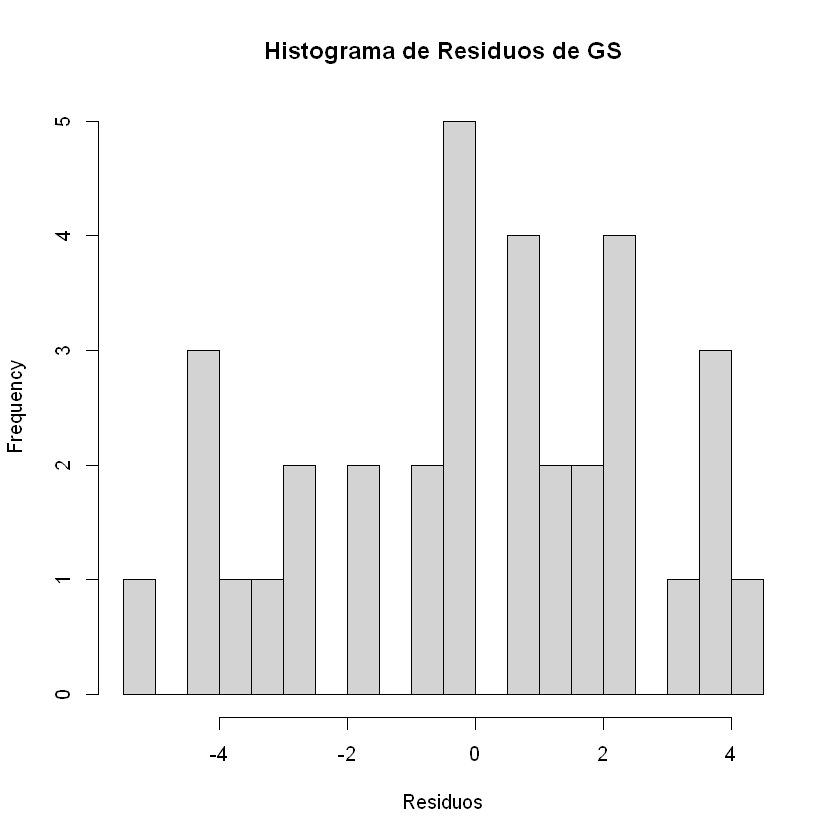

In [8]:
# 1. NORMALIDAD DE LOS RESIDUOS

# Histograma
hist(residuos1, breaks = 15, 
     main = "Histograma de Residuos de GS", 
     xlab = "Residuos")
# Prueba de Jarque-Bera
jarque.bera.test(residuos1)



	Durbin-Watson test

data:  modelo1
DW = 0.92844, p-value = 0.0001168
alternative hypothesis: true autocorrelation is greater than 0


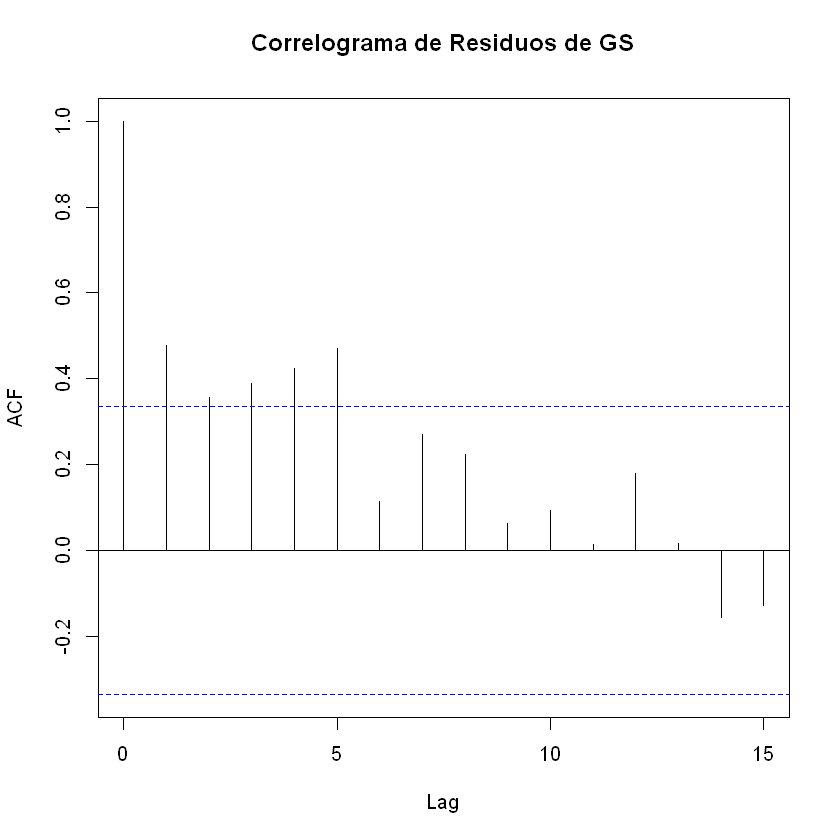

In [9]:
# 2. AUTOCORRELACIÓN DE RESIDUOS

# Prueba de Durbin-Watson
dwtest(modelo1)
# Correlograma (ACF) de los residuos
acf(residuos1, main = "Correlograma de Residuos de GS")




Call:
lm(formula = REZAGOGS ~ PPC + CGS, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2679 -0.9582  0.0697  0.8052  4.3837 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.368e+00  5.412e+00  -0.438    0.665
PPC          2.271e-02  2.742e-02   0.828    0.414
CGS          1.483e-06  6.622e-06   0.224    0.824

Residual standard error: 1.87 on 31 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.0224,	Adjusted R-squared:  -0.04067 
F-statistic: 0.3551 on 2 and 31 DF,  p-value: 0.7039



	Durbin-Watson test

data:  rezago1
DW = 1.9074, p-value = 0.3094
alternative hypothesis: true autocorrelation is greater than 0


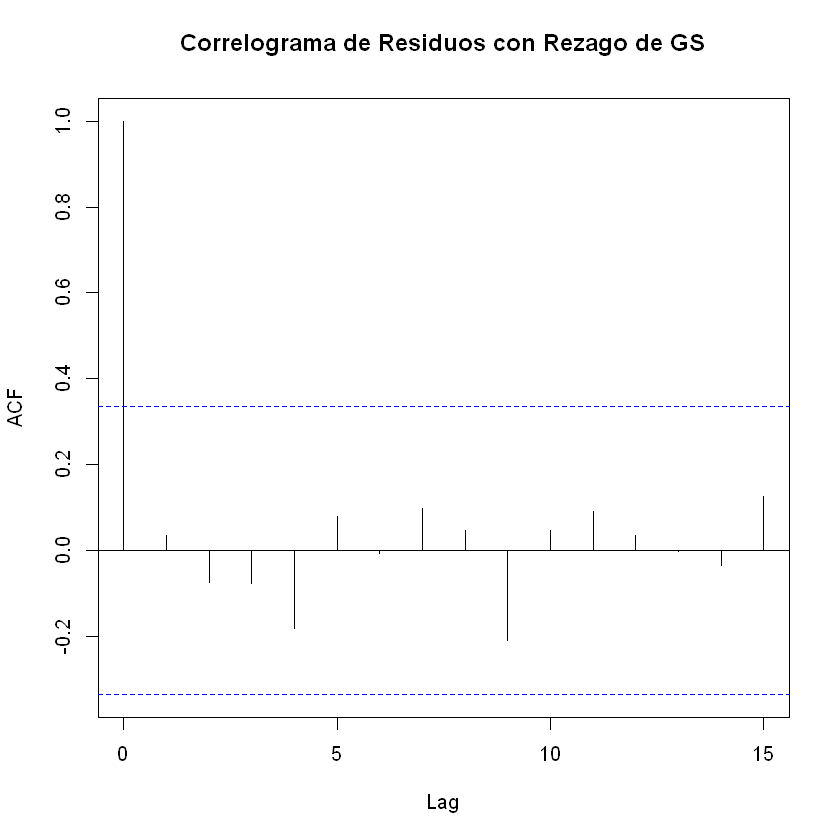

In [10]:
# Ajuste de autocorrelación rezago
rezago1 <- lm(REZAGOGS ~ PPC + CGS, data = df)
summary(rezago1)
# Obtener los residuos del modelo
residuos_rezago1 <- residuals(rezago1)
dwtest(rezago1)
# Correlograma (ACF) de los residuos
acf(residuos_rezago1, 
    main = "Correlograma de Residuos con Rezago de GS")

In [11]:
# 3. HETEROCEDASTICIDAD

# Prueba de Breusch-Pagan
bptest(modelo1)
# Prueba de White
bptest(modelo1, ~ PPC + CGS + I(PPC^2) + I(CGS^2), data = df)



	studentized Breusch-Pagan test

data:  modelo1
BP = 2.1498, df = 2, p-value = 0.3413



	studentized Breusch-Pagan test

data:  modelo1
BP = 8.1205, df = 4, p-value = 0.08726


In [12]:
# MODELO 2 Dependiente de precios de gasolinas(PG), Independiente Consumo de gasolinas Regular (CGR), Precio de petroleo (PPC)
# Ajustar modelo de rmúltiple
modelo2 <- lm(PGR ~ PPC + CGR, data = df)
summary(modelo2)
# Obtener los residuos del modelo
residuos2 <- residuals(modelo2)



Call:
lm(formula = PGR ~ PPC + CGR, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4948 -1.5471  0.0028  2.0279  4.2720 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.432e+00  5.855e+00  -0.415  0.68075    
PPC          1.917e-01  3.533e-02   5.428  6.3e-06 ***
CGR          2.566e-05  7.392e-06   3.471  0.00155 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.642 on 31 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.6148,	Adjusted R-squared:  0.5899 
F-statistic: 24.73 on 2 and 31 DF,  p-value: 3.792e-07



	Jarque Bera Test

data:  residuos2
X-squared = 0.61761, df = 2, p-value = 0.7343


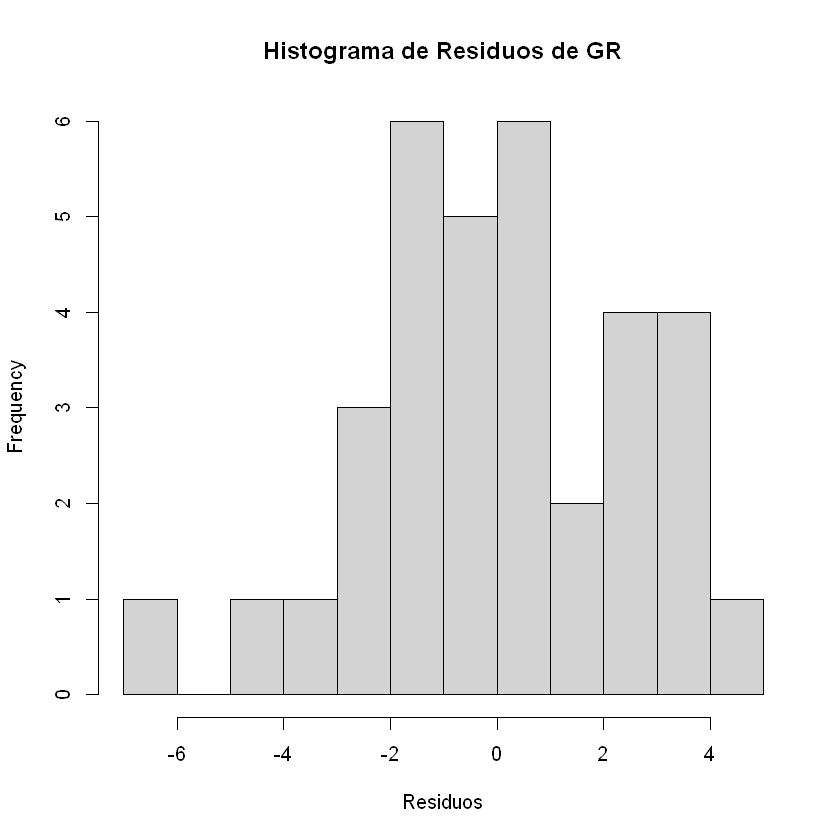

In [13]:
# 1. NORMALIDAD DE LOS RESIDUOS
# Histograma 
hist(residuos2, breaks = 15, 
     main = "Histograma de Residuos de GR", xlab = "Residuos")

# Prueba de Jarque-Bera 
jarque.bera.test(residuos2)



	Durbin-Watson test

data:  modelo2
DW = 1.5771, p-value = 0.06302
alternative hypothesis: true autocorrelation is greater than 0


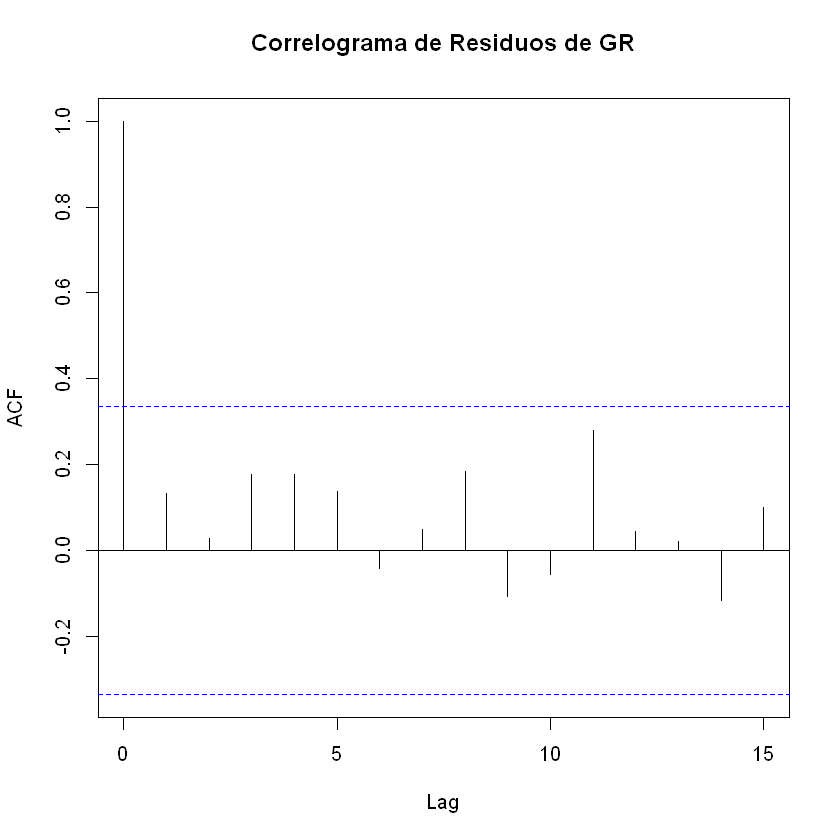

In [14]:
# 2. AUTOCORRELACIÓN DE RESIDUOS

# Prueba de Durbin-Watson
dwtest(modelo2)
# Correlograma (ACF) de los residuos
acf(residuos2, main = "Correlograma de Residuos de GR")




Call:
lm(formula = REZAGOGS ~ PPC + CGR, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0913 -0.7717 -0.1853  0.6276  3.6568 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  5.770e+00  3.889e+00   1.484   0.1480  
PPC          2.837e-02  2.347e-02   1.209   0.2359  
CGR         -1.014e-05  4.910e-06  -2.065   0.0473 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.755 on 31 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1393,	Adjusted R-squared:  0.08372 
F-statistic: 2.508 on 2 and 31 DF,  p-value: 0.09785



	Durbin-Watson test

data:  rezago2
DW = 1.9254, p-value = 0.3167
alternative hypothesis: true autocorrelation is greater than 0


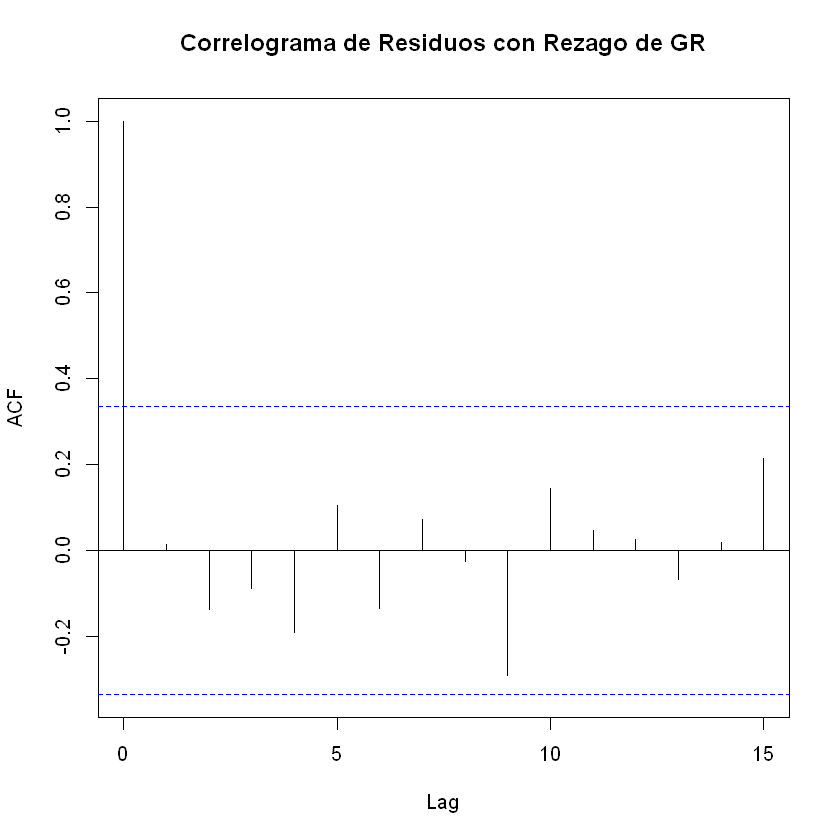

In [15]:
# Ajuste de autocorrelación rezago
rezago2 <- lm(REZAGOGS ~ PPC + CGR, data = df)
summary(rezago2)
# Obtener los residuos del modelo
residuos_rezago2 <- residuals(rezago2)
dwtest(rezago2)
# Correlograma (ACF) de los residuos
acf(residuos_rezago2, main = "Correlograma de Residuos con Rezago de GR")

In [16]:
# 3. HETEROCEDASTICIDAD

# Prueba de Breusch-Pagan
bptest(modelo2)
# Prueba de White
bptest(modelo2, ~ PPC + CGR + I(PPC^2) + I(CGR^2), 
       data = df)



	studentized Breusch-Pagan test

data:  modelo2
BP = 1.7467, df = 2, p-value = 0.4176



	studentized Breusch-Pagan test

data:  modelo2
BP = 4.2483, df = 4, p-value = 0.3734


In [17]:
# MODELO 3 Dependiente de precios de gasolinas(PG), Independiente Consumo de diésel (CD), Precio de petroleo (PPC)

# Ajustar modelo de rmúltiple
modelo3 <- lm(PD ~ PPC + CD, data = df)
summary(modelo3)
# Obtener los residuos del modelo
residuos3 <- residuals(modelo3)


Call:
lm(formula = PD ~ PPC + CD, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1524 -3.4838 -0.7527  3.4749  9.6706 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.529e+01  1.086e+01   2.329 0.026547 *  
PPC          2.360e-01  6.297e-02   3.748 0.000732 ***
CD          -1.203e-05  7.684e-06  -1.566 0.127543    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.774 on 31 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.3562,	Adjusted R-squared:  0.3147 
F-statistic: 8.577 on 2 and 31 DF,  p-value: 0.001085



	Jarque Bera Test

data:  residuos3
X-squared = 1.9485, df = 2, p-value = 0.3775


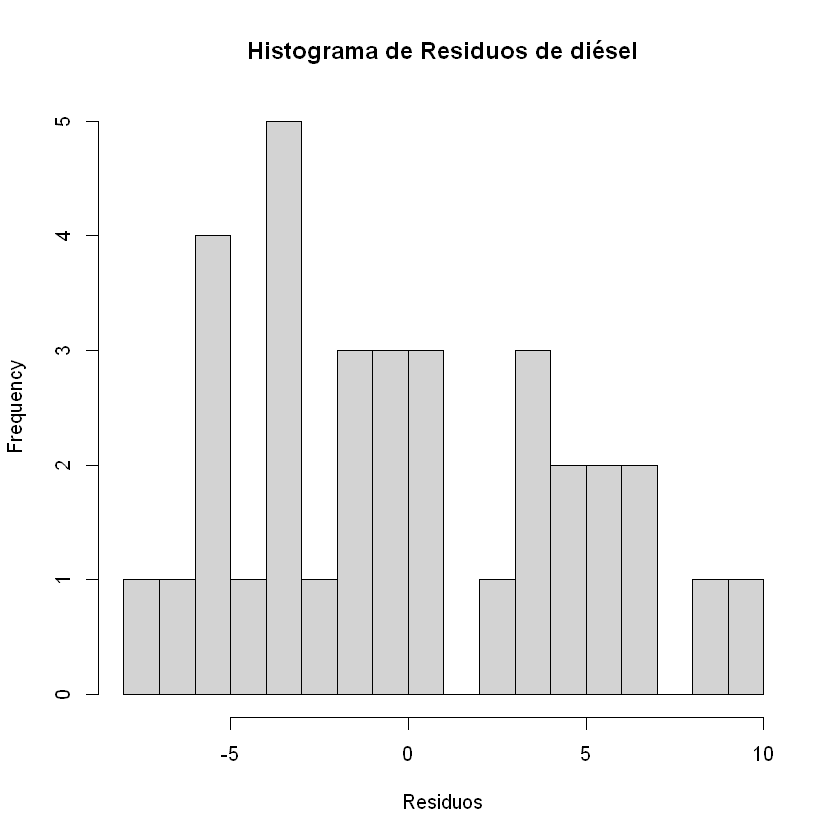

In [18]:
# 1. NORMALIDAD DE LOS RESIDUOS

# Histograma 
hist(residuos3, breaks = 15, 
     main = "Histograma de Residuos de diésel", 
     xlab = "Residuos")
# Prueba de Jarque-Bera 
jarque.bera.test(residuos3)


	Durbin-Watson test

data:  modelo3
DW = 0.49766, p-value = 1.211e-08
alternative hypothesis: true autocorrelation is greater than 0


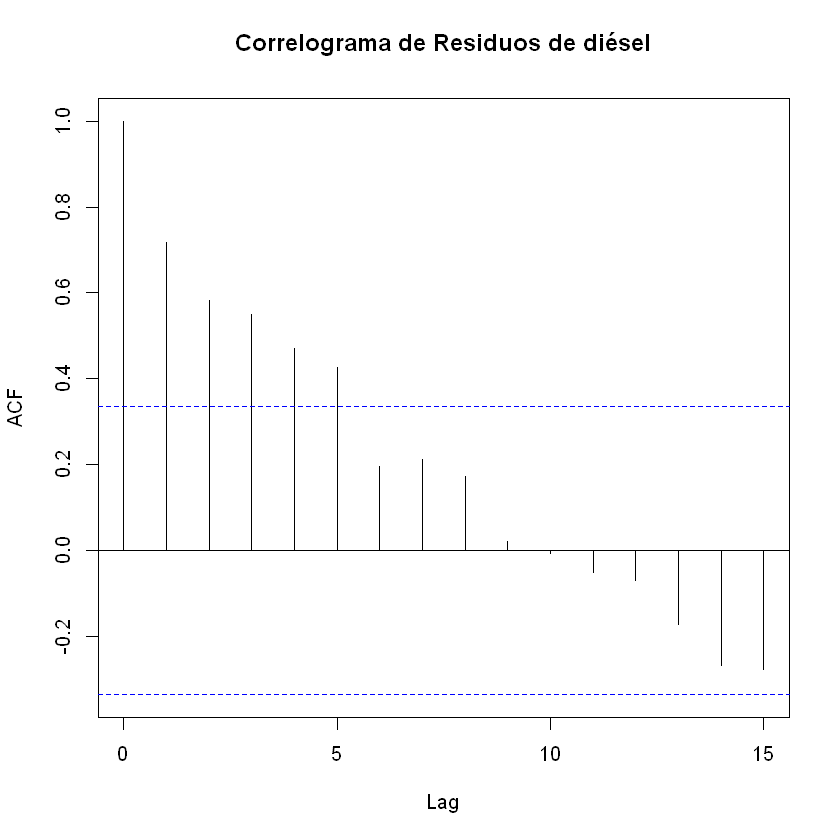

In [19]:
# 2. AUTOCORRELACIÓN DE RESIDUOS

# Prueba de Durbin-Watson
dwtest(modelo3)
# Correlograma (ACF) de los residuos
acf(residuos3, main = "Correlograma de Residuos de diésel")





Call:
lm(formula = REZAGOGS ~ PPC + CD, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1498 -1.1736  0.0666  0.7843  4.1226 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -4.036e+00  4.218e+00  -0.957    0.346
PPC          2.097e-02  2.446e-02   0.857    0.398
CD           2.246e-06  2.985e-06   0.752    0.458

Residual standard error: 1.855 on 31 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.03837,	Adjusted R-squared:  -0.02367 
F-statistic: 0.6185 on 2 and 31 DF,  p-value: 0.5453



	Durbin-Watson test

data:  rezago3
DW = 2.012, p-value = 0.4145
alternative hypothesis: true autocorrelation is greater than 0


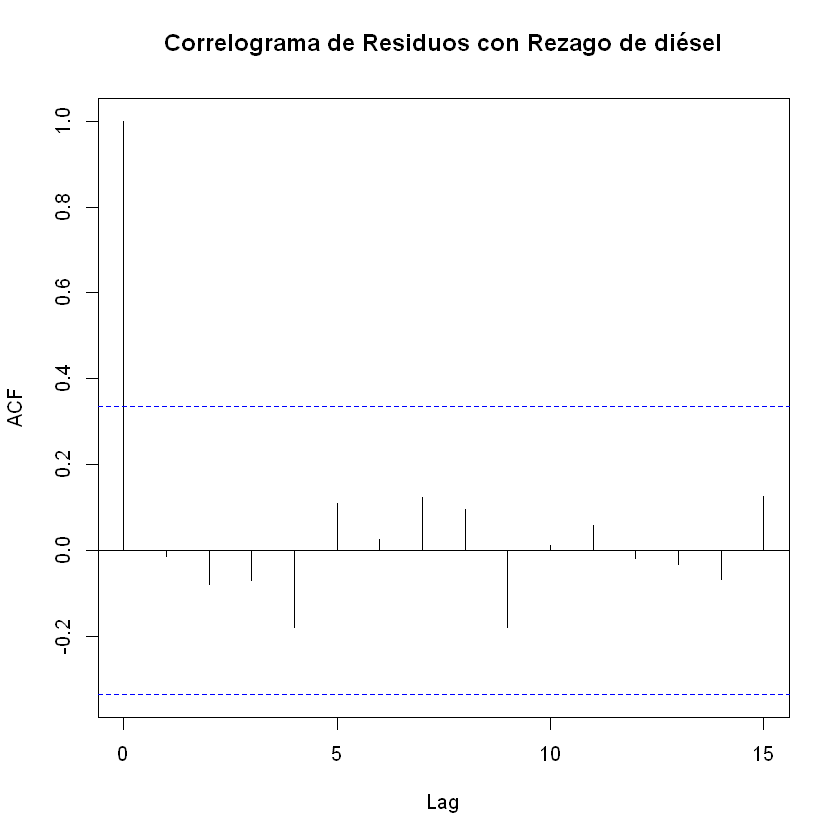

In [20]:
# Ajuste de autocorrelación
rezago3 <- lm(REZAGOGS ~ PPC + CD, data = df)
summary(rezago3)
# Obtener los residuos del modelo
residuos_rezago3 <- residuals(rezago3)
# Prueba de Durbin-Watson
dwtest(rezago3)
# Correlograma (ACF) de los residuos
acf(residuos_rezago3, 
    main = "Correlograma de Residuos con Rezago de diésel")

In [21]:
# 3. HETEROCEDASTICIDAD

# Prueba de Breusch-Pagan
bptest(modelo3)
# Prueba de White
bptest(modelo3, ~ PPC + CD + I(PPC^2) + I(CD^2), 
       data = df)



	studentized Breusch-Pagan test

data:  modelo3
BP = 1.2682, df = 2, p-value = 0.5304



	studentized Breusch-Pagan test

data:  modelo3
BP = 3.4338, df = 4, p-value = 0.488
